# 1. Import Required Libraries

In [11]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error

# For preprocessing
from sklearn.preprocessing import StandardScaler

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')


# 2. Load the Dataset

In [12]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# 3. Basic Data Exploration

In [13]:
df.shape


(1436, 11)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [15]:
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [16]:
df.isnull().sum()


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# 4. Exploratory Data Analysis (EDA)
## Distribution of Target Variable (Price)

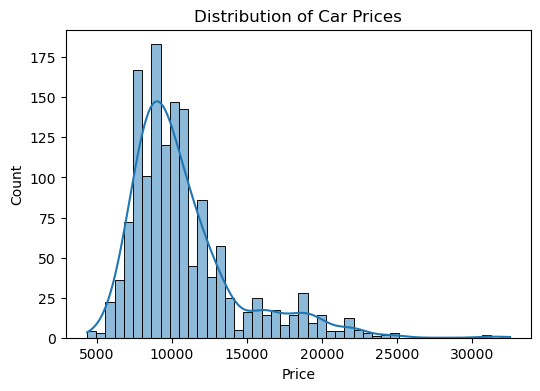

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.show()


# 5. Data Pre-Processing
## Convert Categorical Variable (FuelType)

In [19]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


## Define X (Independent) and Y (Target)

In [20]:
X = df.drop('Price', axis=1)
y = df['Price']


# 6. Train–Test Split (80% – 20%)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 7. Model 1 – Basic Multiple Linear Regression

In [22]:
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


In [24]:
print("Training R2:", r2_score(y_train, y_pred_train))
print("Testing R2 :", r2_score(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Training R2: 0.8702643169608926
Testing R2 : 0.8348888040611082
RMSE: 1484.2654153296517


## Model Coefficients Interpretation

In [25]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
10,Fuel_Type_Petrol,1.370809e+03
7,Gears,5.516007e+02
3,Automatic,1.488309e+02
8,Weight,2.588496e+01
2,HP,1.403948e+01
6,Cylinders,3.694822e-13
1,KM,-1.623141e-02
4,cc,-3.037219e-02
5,Doors,-6.031097e+01
9,Fuel_Type_Diesel,-6.854876e+01


# 8. Model 2 – Standardized Linear Regression

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)


LinearRegression()

In [27]:
y_pred_test2 = model2.predict(X_test_scaled)

print("Testing R2:", r2_score(y_test, y_pred_test2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test2)))


Testing R2: 0.834888804061108
RMSE: 1484.2654153296523


# 9. Model 3 – Reduced Feature Model

In [30]:
# Reduced feature selection (USE EXACT COLUMN NAMES)
X_reduced = df[['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Diesel']]
y = df['Price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Model building
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train_r, y_train_r)

# Prediction
y_pred_test3 = model3.predict(X_test_r)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("Testing R2:", r2_score(y_test_r, y_pred_test3))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_test3)))


Testing R2: 0.8370733325080285
RMSE: 1474.413822966058


# 10. Ridge Regression

In [31]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge R2:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge R2: 0.8350462635431571
Ridge RMSE: 1483.5575063081596


# 11. Lasso Regression

In [32]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso R2:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso R2: 0.8349116135580271
Lasso RMSE: 1484.1628889184242


In [34]:
lasso_coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

lasso_coeff[lasso_coeff['Coefficient'] != 0]


,Feature,Coefficient
0,Age_08_04,-2267.270353
1,KM,-611.710485
2,HP,208.460180
3,Automatic,34.335631
4,cc,-14.044285
5,Doors,-57.288237
7,Gears,109.268038
8,Weight,1316.405210
9,Fuel_Type_Diesel,-21.484319
10,Fuel_Type_Petrol,457.891241


# Interview Questions
## 1. What is Normalization & Standardization?

### Normalization:

### Scales values between 0 and 1

### Used when data has different ranges

Standardization:

Converts data to mean = 0 and std = 1

Helpful for models like Ridge, Lasso, KNN

2. Techniques to Address Multicollinearity

Remove highly correlated variables

Use Ridge Regression

Use Lasso Regression

Apply PCA

Feature selection